## Some tests of yt

A few first attempts to plot some scalar AMR data.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from clawpack.pyclaw import Solution
import numpy as np
import matplotlib.pyplot as plt
import yt
from IPython.display import Image

We would like to make plots similar to those created with our old Matlab plotting tools, e.g. the data in this directory is for 3d Burgers' equation $q_t + q(q_x + q_y + q_z) = 0$ with initial data that is nonzero in a cube

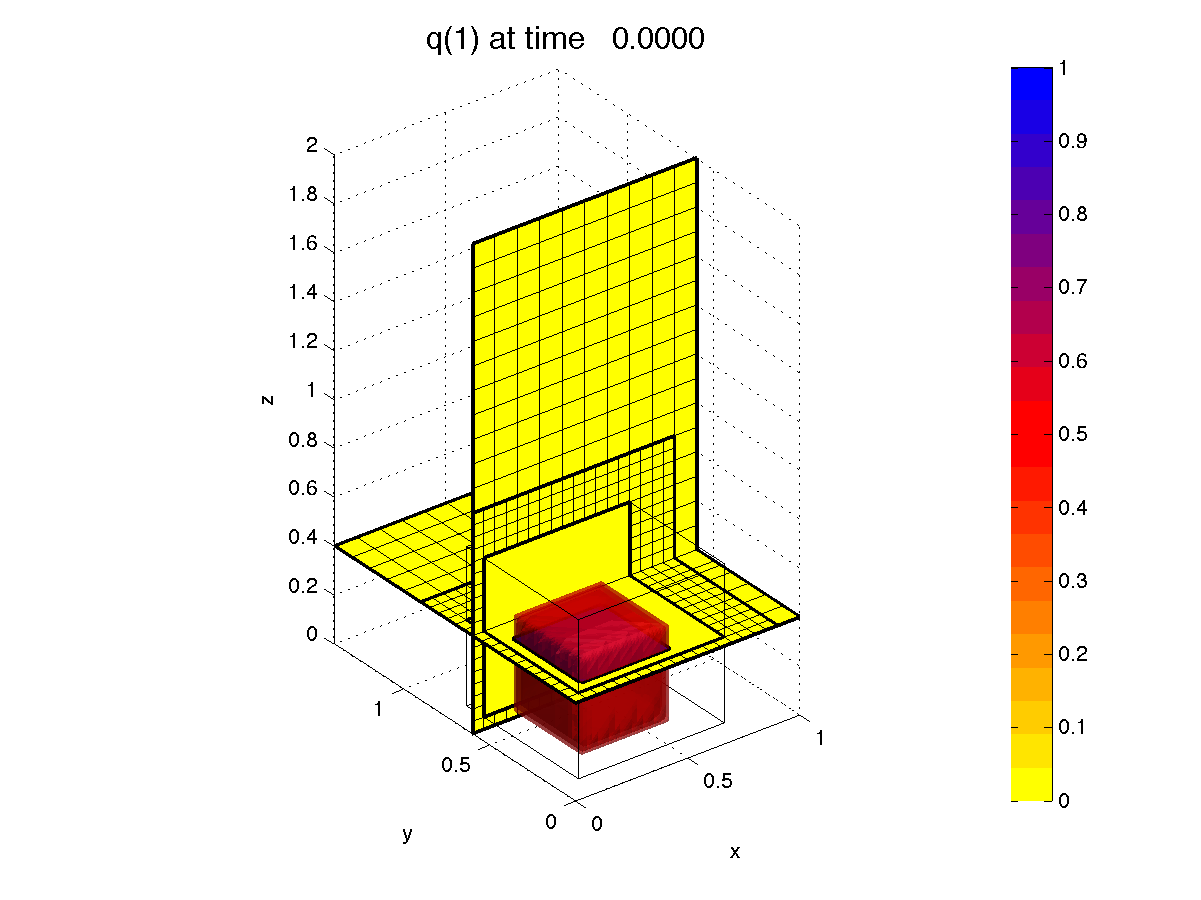

In [123]:
Image('frame0.png', width=400)

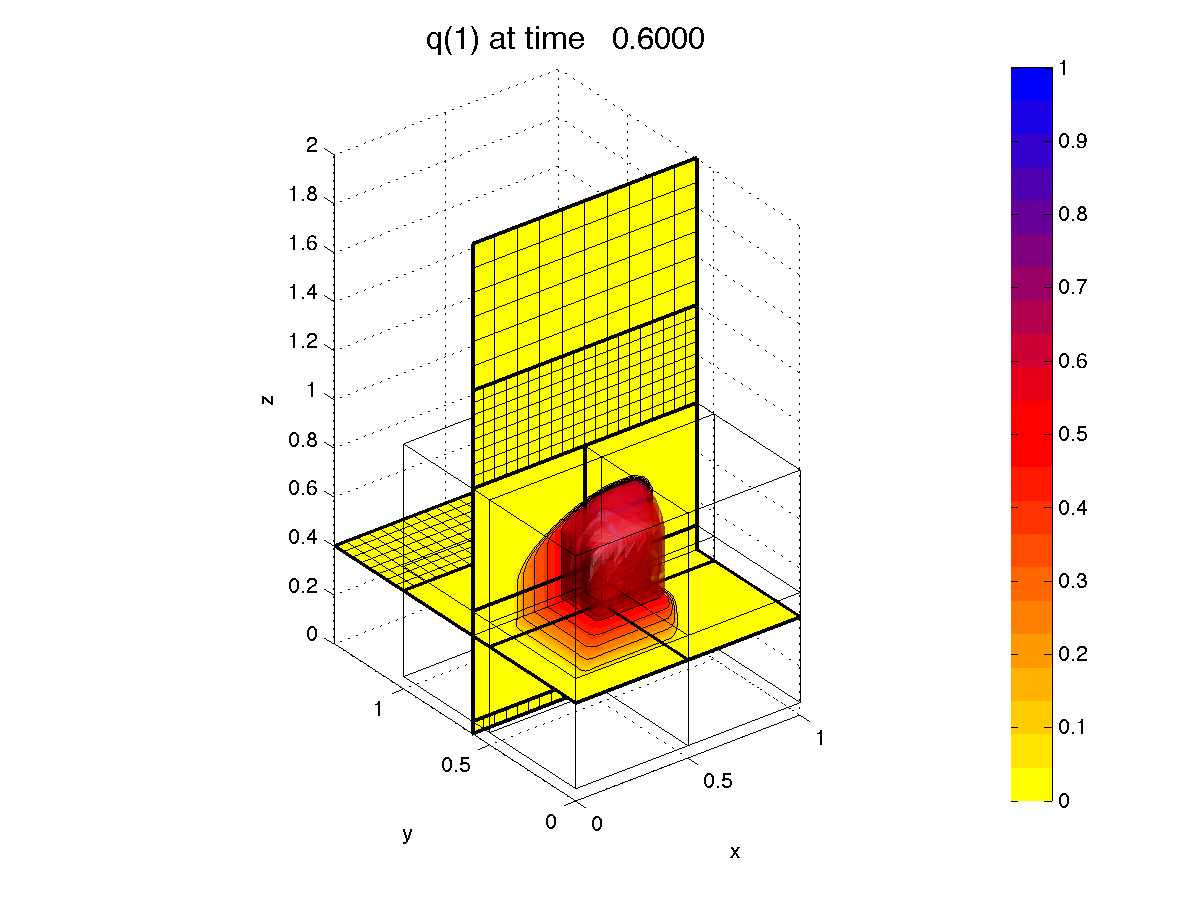

In [124]:
Image('frame3.png', width=400)

In [102]:
def load_ds(frame,path='./_output'):
    """
    Load a frame of amrclaw data and reformat for yt.
    """
    sol = Solution(frame,path=path,file_format='ascii',file_prefix='fort')

    grid_data = []

    for state in sorted(sol.states, key = lambda a: a.patch.level):
        patch = state.patch

        d = {
            'left_edge': patch.lower_global,
            'right_edge': patch.upper_global,
            'level': patch.level,
            'dimensions': patch.num_cells_global,
            'q': state.q[0,...],
            'number_of_particles': 0
            }
        grid_data.append(d)
        bbox = np.vstack((sol.patch.lower_global,sol.patch.upper_global)).T;
    return yt.load_amr_grids(grid_data, sol.patch.num_cells_global, bbox = bbox)

In [103]:
ds = load_ds(0)

yt : [INFO     ] 2016-03-24 21:42:07,728 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-03-24 21:42:07,729 Parameters: domain_dimensions         = [10 14 20]
yt : [INFO     ] 2016-03-24 21:42:07,729 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2016-03-24 21:42:07,730 Parameters: domain_right_edge         = [ 1.   1.4  2. ]
yt : [INFO     ] 2016-03-24 21:42:07,731 Parameters: cosmological_simulation   = 0.0


In [104]:
print "Lower corner: ",ds.domain_left_edge
print "Upper corner: ",ds.domain_right_edge
print "cells: ", ds.domain_dimensions

Lower corner:  [ 0.  0.  0.] code_length
Upper corner:  [ 1.   1.4  2. ] code_length
cells:  [10 14 20]


yt : [INFO     ] 2016-03-24 21:42:10,078 Making a fixed resolution buffer of (q) 450 by 600
yt : [INFO     ] 2016-03-24 21:42:10,111 Loading field plugins.
yt : [INFO     ] 2016-03-24 21:42:10,112 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-03-24 21:42:10,113 Loaded astro (15 new fields)
yt : [INFO     ] 2016-03-24 21:42:10,114 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-03-24 21:42:10,116 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-03-24 21:42:10,118 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-03-24 21:42:10,119 Loaded geometric (112 new fields)
yt : [INFO     ] 2016-03-24 21:42:10,119 Loaded local (112 new fields)
yt : [INFO     ] 2016-03-24 21:42:10,120 Loaded magnetic_field (120 new fields)
yt : [INFO     ] 2016-03-24 21:42:10,121 Loaded my_plugins (120 new fields)
yt : [INFO     ] 2016-03-24 21:42:10,122 Loaded species (122 new fields)


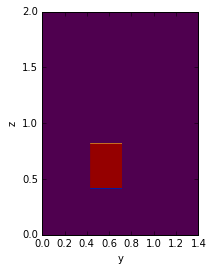

In [105]:
s = ds.slice(0, 0.4) # normal to x axis at x=0.4
width = (3,'cm')
res = [450,600]
frb = s.to_frb(width,res)
q = np.array(frb['q'])

plt.clf()
plt.imshow(q, origin='lower', extent=(0,1.4,0,2))
xlabel('y')
ylabel('z')

This looks reasonable except the coordinates are not right.  Cube starts with 0.1 < x < 0.6 and similarly in y, z.

yt : [INFO     ] 2016-03-24 21:39:28,471 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-03-24 21:39:28,472 Parameters: domain_dimensions         = [10 14 20]
yt : [INFO     ] 2016-03-24 21:39:28,473 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2016-03-24 21:39:28,473 Parameters: domain_right_edge         = [ 1.   1.4  2. ]
yt : [INFO     ] 2016-03-24 21:39:28,474 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-03-24 21:39:28,479 Making a fixed resolution buffer of (q) 450 by 600
yt : [INFO     ] 2016-03-24 21:39:28,736 Loading field plugins.
yt : [INFO     ] 2016-03-24 21:39:28,737 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-03-24 21:39:28,737 Loaded astro (15 new fields)
yt : [INFO     ] 2016-03-24 21:39:28,738 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-03-24 21:39:28,739 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-03-24 21:39:28,741 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2

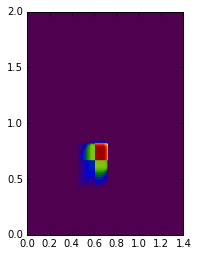

In [98]:
ds = load_ds(3)
s = ds.slice(0, 0.4) # normal to x axis at x=0.4
width = (3,'cm')
res = [450,600]
frb = s.to_frb(width,res)
q = np.array(frb['q'])

plt.clf()
plt.imshow(q, origin='lower', extent=(0,1.4,0,2))

### 3D plots

In [95]:
tf = yt.ColorTransferFunction((0,1))
tf.add_layers(10, colormap = 'RdBu_r')
N = 256

yt : [INFO     ] 2016-03-24 21:43:37,640 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-03-24 21:43:37,641 Parameters: domain_dimensions         = [10 14 20]
yt : [INFO     ] 2016-03-24 21:43:37,642 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2016-03-24 21:43:37,643 Parameters: domain_right_edge         = [ 1.   1.4  2. ]
yt : [INFO     ] 2016-03-24 21:43:37,643 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-03-24 21:43:37,676 Loading field plugins.
yt : [INFO     ] 2016-03-24 21:43:37,677 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-03-24 21:43:37,677 Loaded astro (15 new fields)
yt : [INFO     ] 2016-03-24 21:43:37,678 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-03-24 21:43:37,680 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-03-24 21:43:37,682 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-03-24 21:43:37,682 Loaded geometric (112 new fields)
yt : [INFO     ] 2016-03-24 21:43:3

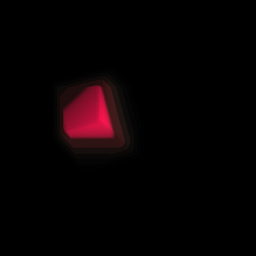

In [106]:
ds = load_ds(1)
c = (0,0,0)
L = (-1,-1.4,-2)
W = 2
cam = ds.camera(c, L, W, N, tf, fields = ['q'], log_fields = [False])
im = cam.snapshot('test_rendering.png')
Image('test_rendering.png')

In [110]:
slc = yt.SlicePlot(ds, 'z', "q",origin="native",center=[.3, .3, .3]);
slc.set_log('q',False);

yt : [INFO     ] 2016-03-24 21:46:06,094 xlim = -0.200000 0.800000
yt : [INFO     ] 2016-03-24 21:46:06,095 ylim = -0.400000 1.000000
yt : [INFO     ] 2016-03-24 21:46:06,097 xlim = -0.200000 0.800000
yt : [INFO     ] 2016-03-24 21:46:06,098 ylim = -0.400000 1.000000
yt : [INFO     ] 2016-03-24 21:46:06,099 Making a fixed resolution buffer of (('gas', 'q')) 800 by 800
yt : [WARNING  ] 2016-03-24 21:46:06,143 Plot image for field ('gas', 'q') has both positive and negative values. Min = -0.000982, Max = 0.636053.
yt : [WARNING  ] 2016-03-24 21:46:06,143 Switching to symlog colorbar scaling unless linear scaling is specified later


At time $t = 0.6$ (frame 3) there are 8 grids at level 3 and this does not seem to work...

yt : [INFO     ] 2016-03-24 21:39:49,010 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-03-24 21:39:49,010 Parameters: domain_dimensions         = [10 14 20]
yt : [INFO     ] 2016-03-24 21:39:49,011 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2016-03-24 21:39:49,012 Parameters: domain_right_edge         = [ 1.   1.4  2. ]
yt : [INFO     ] 2016-03-24 21:39:49,012 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-03-24 21:39:49,048 Loading field plugins.
yt : [INFO     ] 2016-03-24 21:39:49,049 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-03-24 21:39:49,050 Loaded astro (15 new fields)
yt : [INFO     ] 2016-03-24 21:39:49,051 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-03-24 21:39:49,053 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-03-24 21:39:49,054 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-03-24 21:39:49,055 Loaded geometric (112 new fields)
yt : [INFO     ] 2016-03-24 21:39:4

Failed to split grids.
Failed to split grids.
Failed to split grids.
Failed to split grids.
Failed to split grids.
Failed to split grids.
Failed to split grids.
Failed to split grids.
Failed to split grids.
Failed to split grids.
Failed to split grids.
Failed to split grids.
Failed to split grids.
Failed to split grids.
Failed to split grids.
Failed to split grids.
Failed to split grids.
Failed to split grids.
Failed to split grids.
Failed to split grids.
Failed to split grids.
Failed to split grids.
Failed to split grids.
Failed to split grids.


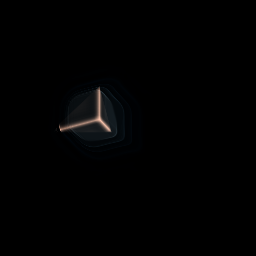

In [100]:
ds = load_ds(3)
c = (0,0,0)
L = (-1,-1.4,-2)
W = 2
cam = ds.camera(c, L, W, N, tf, fields = ['q'], log_fields = [False])
im = cam.snapshot('test_rendering2.png')
Image('test_rendering2.png')